In [ ]:
%pip install mord

In [ ]:
#General imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit imports
from sklearn.datasets import load_breast_cancer, load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Specialized theory
import mord

#Plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline

In [ ]:
cancer_data = load_breast_cancer()
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
features = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)
target = pd.DataFrame(cancer_data.target, columns = ["target"])

data = pd.concat([features, target], axis = 1)

In [ ]:
correlations = data.corr(method = 'spearman')['target'].sort_values(ascending = False)

most_corr_feature_name = correlations.abs().drop('target').idxmax()
most_corr_feature_index = np.where(cancer_data.feature_names == most_corr_feature_name)[0][0]

print(f"The most correlated feature is: '{most_corr_feature_index}'")
print("-" * 50)

The most correlated feature is: '22'
--------------------------------------------------


In [ ]:
correlations


,target
target,1.000000
symmetry error,0.092303
smoothness error,0.052193
mean fractal dimension,0.025903
texture error,-0.019419
fractal dimension error,-0.201492
worst fractal dimension,-0.311477
mean symmetry,-0.332567
mean smoothness,-0.371892
compactness error,-0.380666


In [ ]:
len(data.columns)

31

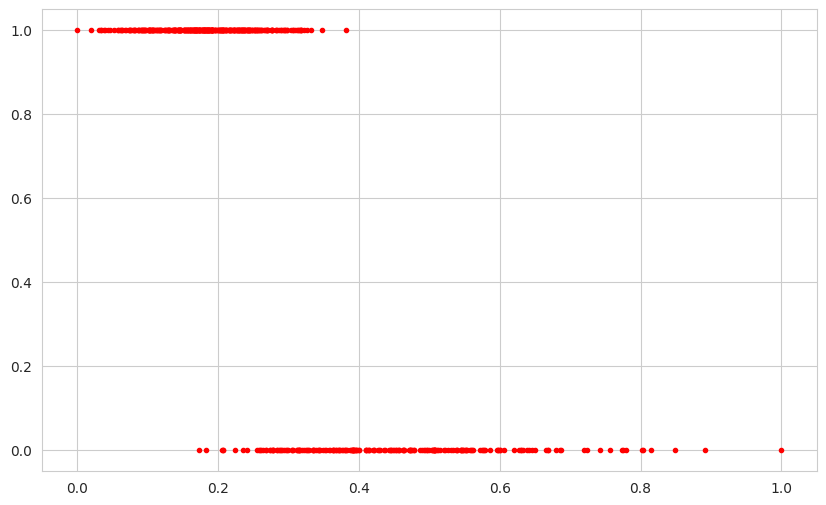

In [ ]:
X = np.array(data['worst perimeter'])
y = np.array(data['target'])

x = (X - X.min()) / (X.max() - X.min())

plt.plot(x, y, 'r.')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

#Add bias term (column of ones)
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

print(f"Using feature '{most_corr_feature_name}' for single-feature analysis.")
print(f"Shape of a single-feature training data: {X_train_b.shape}")

Using feature 'worst perimeter' for single-feature analysis.
Shape of a single-feature training data: (455, 2)


In [ ]:
class BinaryLogisticRegression:

  def __init__(self, learning_rate=0.01, n_iters=1000):
      self.lr = learning_rate
      self.n_iters = n_iters
      self.weights = None
      self.cost_history = []

  def sigmoid(self, z):
      return 1 / (1 + np.exp(-z))

  def fit(self, X, y):
      n_samples, n_features = X.shape
      self.weights = np.zeros(n_features)

      for i in range(self.n_iters):
          linear_model = np.dot(X, self.weights)
          y_predicted = self.sigmoid(linear_model)

          # Calculate gradient and update weights
          dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
          self.weights -= self.lr * dw

          # Store cost for plotting
          cost = -(1/n_samples) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
          self.cost_history.append(cost)

          # Log cost and accuracy every 100 interactions
          if (i + 1) % 100 == 0:
              y_pred_train = self.predict(X)
              accuracy_train = np.mean(y_pred_train == y)
              print(f"Iteration {i+1}/{self.n_iters}: Cost = {cost:.4f}, Accuracy = {accuracy_train:.4f}")


  def predict_probability(self, X):
      return self.sigmoid(np.dot(X, self.weights))

  def predict(self, X):
      linear_model = np.dot(X, self.weights)
      y_predicted_cls = self.sigmoid(linear_model) > 0.5
      return y_predicted_cls

In [ ]:
#Train the model

model_one_feature = BinaryLogisticRegression(learning_rate = 1, n_iters = 1000)
model_one_feature.fit(X_train_b, y_train)

Iteration 100/1000: Cost = 0.2082, Accuracy = 0.9077
Iteration 200/1000: Cost = 0.2035, Accuracy = 0.9077
Iteration 300/1000: Cost = 0.2027, Accuracy = 0.9099
Iteration 400/1000: Cost = 0.2026, Accuracy = 0.9077
Iteration 500/1000: Cost = 0.2025, Accuracy = 0.9077
Iteration 600/1000: Cost = 0.2025, Accuracy = 0.9077
Iteration 700/1000: Cost = 0.2025, Accuracy = 0.9077
Iteration 800/1000: Cost = 0.2025, Accuracy = 0.9077
Iteration 900/1000: Cost = 0.2025, Accuracy = 0.9077
Iteration 1000/1000: Cost = 0.2025, Accuracy = 0.9077


In [ ]:
# Model evaluation

y_pred = model_one_feature.predict(X_test_b)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (one feature): {accuracy:.4f}")

Accuracy (one feature): 0.9649


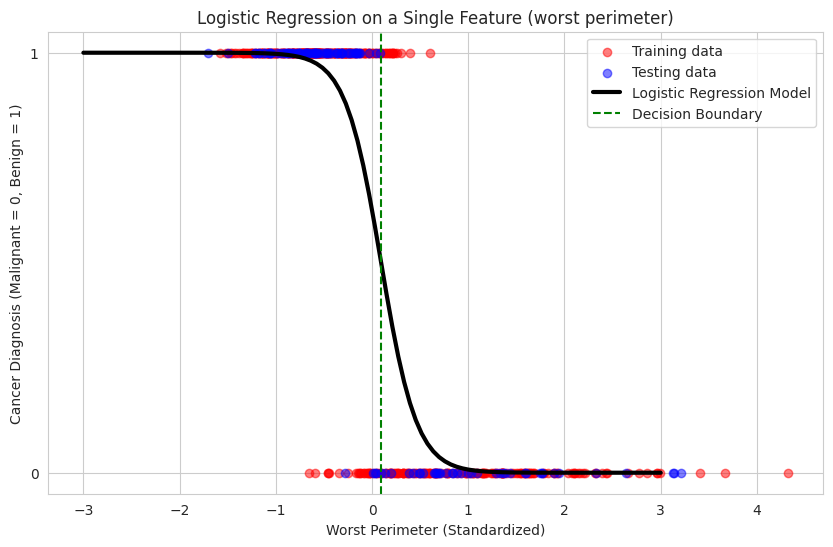

In [ ]:
#Create scatter plot for data
plt.scatter(X_train_scaled, y_train, color = 'red', alpha = 0.5, label = "Training data")
plt.scatter(X_test_scaled, y_test, color = 'blue', alpha = 0.5, label = "Testing data")

#Plot the sigmoid curve
x_vals = np.linspace(-3, 3, 100).reshape(-1, 1)
x_vals_b = np.c_[np.ones((100, 1)), x_vals]
y_vals = model_one_feature.predict_probability(x_vals_b)
plt.plot(x_vals, y_vals, color = 'black', linewidth = 3, label = "Logistic Regression Model")

#Add decision boundary line
dec_bound = -model_one_feature.weights[0] / model_one_feature.weights[1]
plt.axvline(x = dec_bound, color = 'green', linestyle = '--', label = "Decision Boundary")

plt.title(f'Logistic Regression on a Single Feature ({most_corr_feature_name})')
plt.xlabel(f'{most_corr_feature_name.replace("_", " ").title()} (Standardized)')
plt.ylabel('Cancer Diagnosis (Malignant = 0, Benign = 1)')
plt.yticks([0, 1])
plt.legend()
plt.show()